# Import bibliotek

In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo


# Przeprocesowanie zbioru danych

In [2]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
Y = heart_disease.data.targets

Y = Y['num'].replace([1, 2, 3, 4], 1)

X['num'] = Y

median = X['ca'].median()
X['ca'].fillna(median, inplace=True)
mode_category = X['thal'].mode()[0]
X['thal'].fillna(mode_category, inplace=True)

# X = X.dropna()

In [3]:
def one_hot_encode(df, column, column_names):
    dummies = pd.get_dummies(df[column], prefix=column)
    column_names = [column + '_' + str(name) for name in column_names]
    dummies.columns = column_names
    dummies = dummies.astype('int64')
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [4]:
X =  one_hot_encode(X, 'cp', ['typical_angina', 'atypical_angina', 'non-anginal_pain', 'asymptomatic'])
X = one_hot_encode(X, 'thal', ['normal', 'ST-T_wave_abnormality', 'left_ventricular_hypertrophy'])
X = one_hot_encode(X, 'slope', ['upsloping', 'flat', 'downsloping'])
X = one_hot_encode(X, 'restecg', ['normal', 'fixed_defect', 'reversable_defect'])

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                303 non-null    int64  
 1   sex                                303 non-null    int64  
 2   trestbps                           303 non-null    int64  
 3   chol                               303 non-null    int64  
 4   fbs                                303 non-null    int64  
 5   thalach                            303 non-null    int64  
 6   exang                              303 non-null    int64  
 7   oldpeak                            303 non-null    float64
 8   ca                                 303 non-null    float64
 9   num                                303 non-null    int64  
 10  cp_typical_angina                  303 non-null    int64  
 11  cp_atypical_angina                 303 non-null    int64  

In [6]:
X.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_asymptomatic,thal_normal,thal_ST-T_wave_abnormality,thal_left_ventricular_hypertrophy,slope_upsloping,slope_flat,slope_downsloping,restecg_normal,restecg_fixed_defect,restecg_reversable_defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.663366,0.458746,...,0.475248,0.554455,0.059406,0.386139,0.468647,0.462046,0.069307,0.498350,0.013201,0.488449
std,9.038662,0.467299,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.934375,0.499120,...,0.500213,0.497848,0.236774,0.487668,0.499842,0.499382,0.254395,0.500824,0.114325,0.500693
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:

Y = X['num']
X = X.drop('num', axis=1)

X_norm = (X - X.min()) / (X.max() - X.min())
X_norm.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_typical_angina,...,cp_asymptomatic,thal_normal,thal_ST-T_wave_abnormality,thal_left_ventricular_hypertrophy,slope_upsloping,slope_flat,slope_downsloping,restecg_normal,restecg_fixed_defect,restecg_reversable_defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.355564,0.275555,0.148515,0.600055,0.326733,0.167678,0.221122,0.075908,...,0.475248,0.554455,0.059406,0.386139,0.468647,0.462046,0.069307,0.498350,0.013201,0.488449
std,0.188305,0.467299,0.166035,0.118212,0.356198,0.174618,0.469794,0.187270,0.311458,0.265288,...,0.500213,0.497848,0.236774,0.487668,0.499842,0.499382,0.254395,0.500824,0.114325,0.500693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.245283,0.194064,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.339623,0.262557,0.000000,0.625954,0.000000,0.129032,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,0.433962,0.340183,0.000000,0.725191,1.000000,0.258065,0.333333,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# class Neuron():
#     def __init__(self, num_of_weights, stand_dev=1):
#         self.weights = np.random.normal(scale=stand_dev, size=num_of_weights)
#         self.bias = np.random.normal(scale=stand_dev)
#         self.X = None
#         self.derivative = None

#     @staticmethod
#     def sigmoid(X):
#         # return np.exp(-np.logaddexp(0, -X))
#         return 1 / (1 + np.exp(-X))

#     def sigmoid_derivative(self, X):
#         return self.sigmoid(X) * (1 - self.sigmoid(X))

#     def forward(self, inputs):
#         self.X = inputs
#         return self.sigmoid(np.dot(inputs, self.weights) + self.bias)

#     def backward(self, error, weights_next_layer=None):
#         if weights_next_layer is not None:
#             error = error.T @ weights_next_layer
#         self.derivative = error * self.sigmoid_derivative(np.dot(self.X,self.weights) + self.bias)
#         return self.derivative
    
#     def update(self, learning_rate):
#         self.weights -=  learning_rate * np.dot(self.X.T, self.derivative)
#         self.bias -= learning_rate * np.sum(self.derivative)
#         self.X = None
#         self.derivative = None

# class NeuralNetwork():
#     def __init__(self, num_of_inputs, hidden_layers, num_of_outputs, stand_dev=1.0):
#         self.layers = []
#         self.num_of_inputs = num_of_inputs
#         self.hidden_layers = hidden_layers
#         self.num_of_outputs = num_of_outputs
#         self.num_of_hidden_layers = len(hidden_layers)
#         self.stand_dev = stand_dev
        
#         self.layers.append([Neuron(num_of_inputs, self.stand_dev) for _ in range(hidden_layers[0])])
#         for i in range(1, self.num_of_hidden_layers):
#             self.layers.append([Neuron(hidden_layers[i-1], self.stand_dev) for _ in range(hidden_layers[i])])
#         if self.num_of_outputs == 1:
#             self.layers.append([Neuron(hidden_layers[-1], self.stand_dev)])

#     def cross_entropy(self, y, y_pred):
#         return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred), axis=1)

#     def cross_entropy_derivative(self, y, y_pred):
#         return -np.sum(y / y_pred - (1 - y) / (1 - y_pred), axis=1)

#     def forward(self, X):
#         for layer in self.layers:
#             X = np.array([neuron.forward(X) for neuron in layer]).T
#         return X        

#     def backward(self, output_error):
#         # Iterate over the hidden layers in reverse order and calculate their gradients
#         output_layer = self.layers[-1]
#         output_error = np.array([neuron.backward(output_error) for neuron in output_layer])
#         weights_next_layer = np.array([neuron.weights for neuron in output_layer]).T

#         for layer in reversed(self.layers[:-1]):
#             output_error = np.array([neuron.backward(output_error, weights_next_layer[index]) for index, neuron in enumerate(layer)])
#             weights_next_layer = np.array([neuron.weights for neuron in layer]).T
        
#         # Return the final gradients
#         return output_error

#     def update(self, learning_rate):
#         for layer in self.layers:
#             for neuron in layer:
#                 neuron.update(learning_rate)

#     def fit(self, X, y, epochs=1000, batch_size=10, learning_rate=0.005):
#         n_samples, n_features = X.shape
#         # Jeśli batch_size jest większy niż liczba próbek, to ustawiamy go na liczbę próbek -> zwyczajnie uczymy na całym zbiorze GD
#         if batch_size > n_samples:
#             batch_size = n_samples
#         cost_list = []
#         for epoch in range(epochs):
#             random_order = np.random.permutation(n_samples)
#             X_shuffled = X.values[random_order]
#             y_shuffled = y.values[random_order]
#             # lista kosztów w paczkach dla każdej epoki
#             cost_list_in_batch = []

#             for batch_index in range(0, n_samples, batch_size):

#                 X_batch = X_shuffled[batch_index:batch_index + batch_size]
#                 y_batch = y_shuffled[batch_index:batch_index + batch_size].reshape(-1, 1)
#                 predictions = self.forward(X_batch)
#                 output_error = self.cross_entropy_derivative(y_batch, predictions)
#                 self.backward(output_error)
#                 self.update(learning_rate)
                
#             cost = self.cross_entropy(y_batch, predictions)
#             cost_list.append(np.mean(cost))

#             if epoch % (epochs // 8) == 0:
#                 print(f'Epoch: {epoch}, Loss: {np.mean(cost)}')

#             # self.cost_list.append(cost)
#             # iteration_cost = np.mean(cost_list_in_batch)
#             # self.mean_cost_list.append(iteration_cost)
#             # self.epoch_list.append(i)
#         print(f'Epoch: {epoch}, Loss: {np.mean(cost)}')
#         return self, cost_list


#     def predict(self, X):
#         return self.forward(X)

# Implementacja Sieci Neuronowej

In [9]:
def sigmoid(X):
    return np.exp(-np.logaddexp(0, -X))

def sigmoid_derivative(X):
    return sigmoid(X) * (1 - sigmoid(X))

def cross_entropy(y, y_pred):
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred), axis=1)

def cross_entropy_derivative(y, y_pred):
    return -np.sum(y / y_pred - (1 - y) / (1 - y_pred), axis=1)

class Neuron():
    def __init__(self, num_of_weights, activation_function, activation_derivative, stand_dev=1):
        self.weights = np.random.normal(scale=stand_dev, size=num_of_weights)
        self.bias = np.random.normal(scale=stand_dev)
        self.X = None
        self.derivative = None
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative

    def forward(self, inputs):
        self.X = inputs
        return self.activation_function(np.dot(inputs, self.weights) + self.bias)

    def backward(self, error, weights_next_layer=None):
        if weights_next_layer is not None:
            error = error.T @ weights_next_layer
        self.derivative = error * self.activation_derivative(np.dot(self.X, self.weights) + self.bias)
        return self.derivative

    def update(self, learning_rate):
        self.weights -= learning_rate * np.dot(self.X.T, self.derivative)
        self.bias -= learning_rate * np.sum(self.derivative)
        self.X = None
        self.derivative = None



class NeuralNetwork():
    def __init__(self, num_of_inputs, hidden_layers, num_of_outputs, activation_function = sigmoid, activation_derivative = sigmoid_derivative, loss_function = cross_entropy, loss_derivative = cross_entropy_derivative, stand_dev=1.0):
        self.layers = []
        self.num_of_inputs = num_of_inputs
        self.hidden_layers = hidden_layers
        self.num_of_outputs = num_of_outputs
        self.num_of_hidden_layers = len(hidden_layers)
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative
        self.loss_function = loss_function
        self.loss_derivative = loss_derivative
        self.stand_dev = stand_dev

        self.layers.append([Neuron(num_of_inputs, activation_function, activation_derivative, self.stand_dev) for _ in range(hidden_layers[0])])
        for i in range(1, self.num_of_hidden_layers):
            self.layers.append([Neuron(hidden_layers[i-1], activation_function, activation_derivative, self.stand_dev) for _ in range(hidden_layers[i])])
        if self.num_of_outputs == 1:
            self.layers.append([Neuron(hidden_layers[-1], activation_function, activation_derivative, self.stand_dev)])

    def forward(self, X):
        for layer in self.layers:
            X = np.array([neuron.forward(X) for neuron in layer]).T
        return X

    def backward(self, output_error):
        output_layer = self.layers[-1]
        output_error = np.array([neuron.backward(output_error) for neuron in output_layer])
        weights_next_layer = np.array([neuron.weights for neuron in output_layer]).T

        for layer in reversed(self.layers[:-1]):
            output_error = np.array([neuron.backward(output_error, weights_next_layer[index]) for index, neuron in enumerate(layer)])
            weights_next_layer = np.array([neuron.weights for neuron in layer]).T

        return output_error

    def update(self, learning_rate):
        for layer in self.layers:
            for neuron in layer:
                neuron.update(learning_rate)

    def fit(self, X, y, X_test, Y_test, epochs=1000, batch_size=30, learning_rate=0.001):
        n_samples = X.shape[0]
        if batch_size > n_samples:
            batch_size = n_samples
        train_cost_list = []

        test_cost_list = []

        for epoch in range(epochs):
            random_order = np.random.permutation(n_samples)
            X_shuffled = X.values[random_order]
            y_shuffled = y.values[random_order]


            for batch_index in range(0, n_samples, batch_size):
                X_batch = X_shuffled[batch_index:batch_index + batch_size]
                y_batch = y_shuffled[batch_index:batch_index + batch_size].reshape(-1, 1)
                predictions = self.forward(X_batch)
                output_error = self.loss_derivative(y_batch, predictions)
                self.backward(output_error)
                self.update(learning_rate)
                

            train_cost = np.mean(self.loss_function(y_batch, predictions))
                
            test_predictions = self.predict(X_test)
            test_cost = np.mean(self.loss_function(Y_test.values.reshape(-1, 1), test_predictions))

            train_cost_list.append(train_cost)

            test_cost_list.append(test_cost)

            if epoch % (epochs // 8) == 0:
                print(f'Epoch: {epoch}, Train Loss: {train_cost}, Test Loss: {test_cost}')

        print(f'Epoch: {epoch}, Train Loss: {train_cost}, Test Loss: {test_cost}')
        return self, train_cost_list, test_cost_list

    def predict(self, X):
        return self.forward(X)




Na samym początku zdefiniowałem potrzebną funkcję aktywacji oraz jej pochodną.

- `sigmoid(x)` - stabilnie numeryczna funkcja sigmoidalna
- `sigmoid_derivative(x)` - pochodna funkcji sigmoidalnej

Oraz funkcję liczenia kosztu:
- `cross_entropy(y, y_pred)` - funkcja kosztu
- `cross_entropy_derivative(y, y_pred)` - pochodna funkcji kosztu



Klasa `Neuron` reprezentuje pojedynczy neuron w sieci neuronowej. Przyjmuje następujące parametry podczas inicjalizacji:

- `num_of_weights`: Liczba wag (parametrów) neuronu.
- `activation_function`: Funkcja aktywacji neuronu. Przekazana przez parametr. Domyślnie funkcja sigmoidalna.
- `activation_derivative`: Pochodna funkcji aktywacji neuronu. Przekazana przez parametr. Domyślnie pochodna funkcji sigmoidalnej.
- `stand_dev`: Odchylenie standardowe używane do inicjalizacji wag neuronu (domyślnie 1).


Metody klasy Neuron obejmują:
- `forward(self, inputs)` - wykonuje krok przód, zapisuje wejście (macierz) do propagacji wstcznej, oblicza wyjście neuronu na podstawie wejścia i funkcji aktywacji.
- `backward(self, error, weights_next_layer=None)` - wykonuje krok wstecz, oblicza pochodną błędu względem wejścia neuronu. Przyjmuje macierz gradientów z wartswy następnej. Dla warstwy wyjściowej przyjmuje błąd wyjściowy. Zwraca macierz gradientów dla warstwy poprzedniej. Jeżeli przyjmuje wagi warstwy następnej to obliczany jest sumę ilocznu wag i gradientów z warstwy następnej, potem zwracamy macierz pochodnych funkcji kosztu.
- `update(self, learning_rate)` - aktualizuje wagi oraz bias neuronu na podstawie gradientów funkcji kosztu dla każdej z wag i współczynnika uczenia. Przechodzimy po wszystkich wagach i aktualizujemy je.


Klasa `NeuralNetwork` reprezentuje sieć neuronową. Przyjmuje następujące parametry podczas inicjalizacji:
- `num_of_inputs`: Liczba wejść sieci.
- `hidden_layers`: Lista zawierająca liczbę neuronów w każdej z warstw ukrytych.
- `num_of_outputs`: Liczba wyjść sieci.
- `activation_function`: Funkcja aktywacji uzywana w neuronach sieci. 
- `activattion_deerivative`: Pochodna funkcji aktywacji.
- `loss_function`:  Funkcja kosztu sieci.
- `loss_derivative`: Pochodna funkcji kosztu sieci.
- `stand_dev`: Odchylenie standardowe przy inicjacji wag neuronów w warstwach sieci.

Metody klasy NeuralNetwork obejmują:

- `forward(self, inputs)`: Wykonuje krok przód, obliczając wyjście neuronu na podstawie wejścia i funkcji aktywacji. Przyjmuje na wejsciu macierz wejść sieci czyli danych, wyniki przekazuje jako macierz wyjść, które są wejściem dla kolejnej warstwy, tak do momentu aż dojdziemy do ostatniej warstwy, która zwraca wynik.
- `backward(self, error, weights_next_layer=None)`: Wykonuje krok wstecz, obliczając pochodną błędu względem wejścia neuronu. Jeśli - dostępne są wagi warstwy następnej, można je przekazać, aby obliczyć błąd wsteczny w oparciu o te wagi. W przypadku ostaniej warstwy wyjściowej nie mamy wag następnej warstwy, więc przekazujemy None. Wtedy obliczamy błąd wsteczny na podstawie błędu wyjściowego, który jest przekazany jako parametr.
- `update(self, learning_rate)`: Aktualizuje wagi oraz bias neuronu na podstawie pochodnej błędu i współczynnika uczenia. Czynność wykonuje się przez wszystkie neurony w warstwie. Przechodzimy po wszystkich warstwach. Przyjmuje jako parametr współczynnik uczenia.
- `fit(self, X, y, epochs=1000, batch_size=20, learning_rate=0.001)` - funkcja przeprowadzająca procedure nauki modelu. Przyjmuje:
    - `X`: dane wejściowe
    - `y`: dane wyjściowe
    - `epochs` : liczba epok, domyślnie 1000
    - `batch_size`: rozmiar batcha, domyślnie 20
    - `learning_rate`: współczynnik uczenia, domyślnie 0.001
    Metoda w ramach każdej epoki oraz batcha wykonuje `forward`, obliczenie kosztu, `backward`, oraz `update`.

- `predict(self, X)` - na wejściu przyjmuj macierz wejść do sieci, zwraca wynik wywnioskowany przez sieć



# Badanie zahchowania modelu od jego ustawień

In [13]:
seed = 42
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X, Y, test_size=0.2, random_state=42)

# domyślna sieć
default_hidden_layers = [8, 4]

#1.Różnej wymiarowości warstwy ukrytej
dim_hidd_1 = [4, 8]
dim_hidd_2 = [20, 10]
dim_hidd_3 = [50, 25]
#2. Różnej wartości współczynnika uczenia
learning_rate_1 = 0.0001
learning_rate_2 = 0.01
#3. Różnej wartości parametru standaryzacji
stand_dev_1 = 0.5
stand_dev_2 = 0.1
#4.danych znormalizownaych i nieznormalizowanych
unnorm = X_train_n, Y_train_n
#5. Różnej liczby watstw ukrytych
hidden_layers_size_1 = [8]
hidden_layers_size_2 = [8,8,8]
hidden_layers_size_3 = [8,8,8,8]

default_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=default_hidden_layers, num_of_outputs=1)
dim_hidd_1_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=dim_hidd_1, num_of_outputs=1)
dim_hidd_2_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=dim_hidd_2, num_of_outputs=1)
dim_hidd_3_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=dim_hidd_3, num_of_outputs=1)
learning_rate_1_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=default_hidden_layers, num_of_outputs=1)
learning_rate_2_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=default_hidden_layers, num_of_outputs=1)
stand_dev_1_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=default_hidden_layers, num_of_outputs=1, stand_dev=stand_dev_1)
stand_dev_2_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=default_hidden_layers, num_of_outputs=1, stand_dev=stand_dev_2)
unnorm_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=default_hidden_layers, num_of_outputs=1)
hidden_layers_size_1_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=hidden_layers_size_1, num_of_outputs=1)
hidden_layers_size_2_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=hidden_layers_size_2, num_of_outputs=1)
hidden_layers_size_3_nn = NeuralNetwork(num_of_inputs=X_train.shape[1], hidden_layers=hidden_layers_size_3, num_of_outputs=1)

print('Default')
default_mlp, loss_history_1, test_hist_1 = default_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Dim hidd 1')
dim_hidd_1_mlp, loss_history_2, test_hist_2 = dim_hidd_1_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Dim hidd 2')
dim_hidd_2_mlp, loss_history_3, test_hist_3  = dim_hidd_2_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Dim hidd 3')
dim_hidd_3_mlp, loss_history_4, test_hist_4 = dim_hidd_3_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Learning rate 1')
learning_rate_1_mlp, loss_history_5, test_hist_5 = learning_rate_1_nn.fit(X_train, Y_train, X_test, Y_test, learning_rate=learning_rate_1)
print('----------------')
print('Learning rate 2')
learning_rate_2_mlp, loss_history_6, test_hist_6 = learning_rate_2_nn.fit(X_train, Y_train, X_test, Y_test, learning_rate=learning_rate_2)
print('----------------')
print('Stand dev 1')
stand_dev_1_mlp, loss_history_7, test_hist_7 = stand_dev_1_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Stand dev 2')
stand_dev_2_mlp, loss_history_8, test_hist_8 = stand_dev_2_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Unnorm')
unnorm_mlp, loss_history_9, test_hist_9 = unnorm_nn.fit(X_train_n, Y_train_n, X_test_n, Y_test_n)
print('----------------')
print('Hidden layers size 1')
hidden_layers_size_1_mlp, loss_history_10, test_hist_10 = hidden_layers_size_1_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Hidden layers size 2')
hidden_layers_size_2_mlp, loss_history_11, test_hist_11= hidden_layers_size_2_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')
print('Hidden layers size 3')
hidden_layers_size_3_mlp, loss_history_12, test_hist_12 = hidden_layers_size_3_nn.fit(X_train, Y_train, X_test, Y_test)
print('----------------')


Default
Epoch: 0, Train Loss: 0.5874641190104357, Test Loss: 0.6735195822860984
Epoch: 125, Train Loss: 0.5946569971802614, Test Loss: 0.4341276352352594
Epoch: 250, Train Loss: 0.3399047367382926, Test Loss: 0.3628067400260315
Epoch: 375, Train Loss: 2.2916302697887443, Test Loss: 0.3372528966720246
Epoch: 500, Train Loss: 0.1188185439255205, Test Loss: 0.32329106289500686
Epoch: 625, Train Loss: 0.4219015937115189, Test Loss: 0.31931764522878475
Epoch: 750, Train Loss: 1.586140859010083, Test Loss: 0.3251517528392578
Epoch: 875, Train Loss: 0.09918868656041749, Test Loss: 0.33740318876993014
Epoch: 999, Train Loss: 0.3587768914228706, Test Loss: 0.3509707914951122
----------------
Dim hidd 1
Epoch: 0, Train Loss: 0.6312080829670721, Test Loss: 0.6766798976515004
Epoch: 125, Train Loss: 0.997975490974232, Test Loss: 0.5375420282697235
Epoch: 250, Train Loss: 0.31870900069770064, Test Loss: 0.4197652851172967
Epoch: 375, Train Loss: 0.6459264215947393, Test Loss: 0.36982948795130954
Ep

Predykcje

In [14]:
default_mlp_predictions = default_mlp.predict(X_test)
default_mlp_predictions = np.where(default_mlp_predictions > 0.5, 1, 0)

dim_hidd_1_mlp_predictions = dim_hidd_1_mlp.predict(X_test)
dim_hidd_1_mlp_predictions = np.where(dim_hidd_1_mlp_predictions > 0.5, 1, 0)

dim_hidd_2_mlp_predictions = dim_hidd_2_mlp.predict(X_test)
dim_hidd_2_mlp_predictions = np.where(dim_hidd_2_mlp_predictions > 0.5, 1, 0)

dim_hidd_3_mlp_predictions = dim_hidd_3_mlp.predict(X_test)
dim_hidd_3_mlp_predictions = np.where(dim_hidd_3_mlp_predictions > 0.5, 1, 0)

learning_rate_1_mlp_predictions = learning_rate_1_mlp.predict(X_test)
learning_rate_1_mlp_predictions = np.where(learning_rate_1_mlp_predictions > 0.5, 1, 0)

learning_rate_2_mlp_predictions = learning_rate_2_mlp.predict(X_test)
learning_rate_2_mlp_predictions = np.where(learning_rate_2_mlp_predictions > 0.5, 1, 0)

stand_dev_1_mlp_predictions = stand_dev_1_mlp.predict(X_test)
stand_dev_1_mlp_predictions = np.where(stand_dev_1_mlp_predictions > 0.5, 1, 0)

stand_dev_2_mlp_predictions = stand_dev_2_mlp.predict(X_test)
stand_dev_2_mlp_predictions = np.where(stand_dev_2_mlp_predictions > 0.5, 1, 0) 

unnorm_mlp_predictions = unnorm_mlp.predict(X_test_n)
unnorm_mlp_predictions = np.where(unnorm_mlp_predictions > 0.5, 1, 0)

hidden_layers_size_1_mlp_predictions = hidden_layers_size_1_mlp.predict(X_test)
hidden_layers_size_1_mlp_predictions = np.where(hidden_layers_size_1_mlp_predictions > 0.5, 1, 0)

hidden_layers_size_2_mlp_predictions = hidden_layers_size_2_mlp.predict(X_test)
hidden_layers_size_2_mlp_predictions = np.where(hidden_layers_size_2_mlp_predictions > 0.5, 1, 0)

hidden_layers_size_3_mlp_predictions = hidden_layers_size_3_mlp.predict(X_test)
hidden_layers_size_3_mlp_predictions = np.where(hidden_layers_size_3_mlp_predictions > 0.5, 1, 0)



#Metrics
print('Default')
print(f'Accuracy: {accuracy_score(Y_test, default_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, default_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, default_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, default_mlp_predictions)}')
print('----------------')

print(f'hidden_1 {dim_hidd_1_mlp.hidden_layers}')
print(f'Accuracy: {accuracy_score(Y_test, dim_hidd_1_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, dim_hidd_1_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, dim_hidd_1_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, dim_hidd_1_mlp_predictions)}')
print('----------------')

print(f'hidden_2 {dim_hidd_2_mlp.hidden_layers}')
print(f'Accuracy: {accuracy_score(Y_test, dim_hidd_2_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, dim_hidd_2_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, dim_hidd_2_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, dim_hidd_2_mlp_predictions)}')
print('----------------')

print(f'hidden_3 {dim_hidd_3_mlp.hidden_layers}')
print(f'Accuracy: {accuracy_score(Y_test, dim_hidd_3_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, dim_hidd_3_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, dim_hidd_3_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, dim_hidd_3_mlp_predictions)}')
print('----------------')

print(f'learning_rate_1 {learning_rate_1}')
print(f'Accuracy: {accuracy_score(Y_test, learning_rate_1_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, learning_rate_1_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, learning_rate_1_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, learning_rate_1_mlp_predictions)}')
print('----------------')

print(f'learning_rate_2 {learning_rate_2}')
print(f'Accuracy: {accuracy_score(Y_test, learning_rate_2_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, learning_rate_2_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, learning_rate_2_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, learning_rate_2_mlp_predictions)}')
print('----------------')

print(f'stand_dev_1 = {stand_dev_1}')
print(f'Accuracy: {accuracy_score(Y_test, stand_dev_1_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, stand_dev_1_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, stand_dev_1_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, stand_dev_1_mlp_predictions)}')
print('----------------')

print(f'stand_dev_2 = {stand_dev_2}')
print(f'Accuracy: {accuracy_score(Y_test, stand_dev_2_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, stand_dev_2_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, stand_dev_2_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, stand_dev_2_mlp_predictions)}')
print('----------------')

print('unnorm')
print(f'Accuracy: {accuracy_score(Y_test_n, unnorm_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test_n, unnorm_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test_n, unnorm_mlp_predictions)}')
print(f'F1: {f1_score(Y_test_n, unnorm_mlp_predictions)}')
print('----------------')

print(f'hidden_layers_size_1 {hidden_layers_size_1_mlp.hidden_layers}')
print(f'Accuracy: {accuracy_score(Y_test, hidden_layers_size_1_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, hidden_layers_size_1_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, hidden_layers_size_1_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, hidden_layers_size_1_mlp_predictions)}')
print('----------------')

print(f'hidden_layers_size_2 {hidden_layers_size_2_mlp.hidden_layers}')
print(f'Accuracy: {accuracy_score(Y_test, hidden_layers_size_2_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, hidden_layers_size_2_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, hidden_layers_size_2_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, hidden_layers_size_2_mlp_predictions)}')
print('----------------')

print(f'hidden_layers_size_3 {hidden_layers_size_3_mlp.hidden_layers}')
print(f'Accuracy: {accuracy_score(Y_test, hidden_layers_size_3_mlp_predictions)}')
print(f'Precision: {precision_score(Y_test, hidden_layers_size_3_mlp_predictions)}')
print(f'Recall: {recall_score(Y_test, hidden_layers_size_3_mlp_predictions)}')
print(f'F1: {f1_score(Y_test, hidden_layers_size_3_mlp_predictions)}')
print('----------------')




Default
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615
----------------
hidden_1 [4, 8]
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1: 0.8787878787878787
----------------
hidden_2 [20, 10]
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1: 0.870967741935484
----------------
hidden_3 [50, 25]
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1: 0.8787878787878787
----------------
learning_rate_1 0.0001
Accuracy: 0.7377049180327869
Precision: 0.8636363636363636
Recall: 0.59375
F1: 0.7037037037037037
----------------
learning_rate_2 0.01
Accuracy: 0.7704918032786885
Precision: 0.7647058823529411
Recall: 0.8125
F1: 0.787878787878788
----------------
stand_dev_1 = 0.5
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1: 0.8923076923076922
----------------
stand_dev_2 = 0.1
Accuracy: 0.47540983606557374
Precision: 0.0
Recall: 0.0
F1: 0.0
----------

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


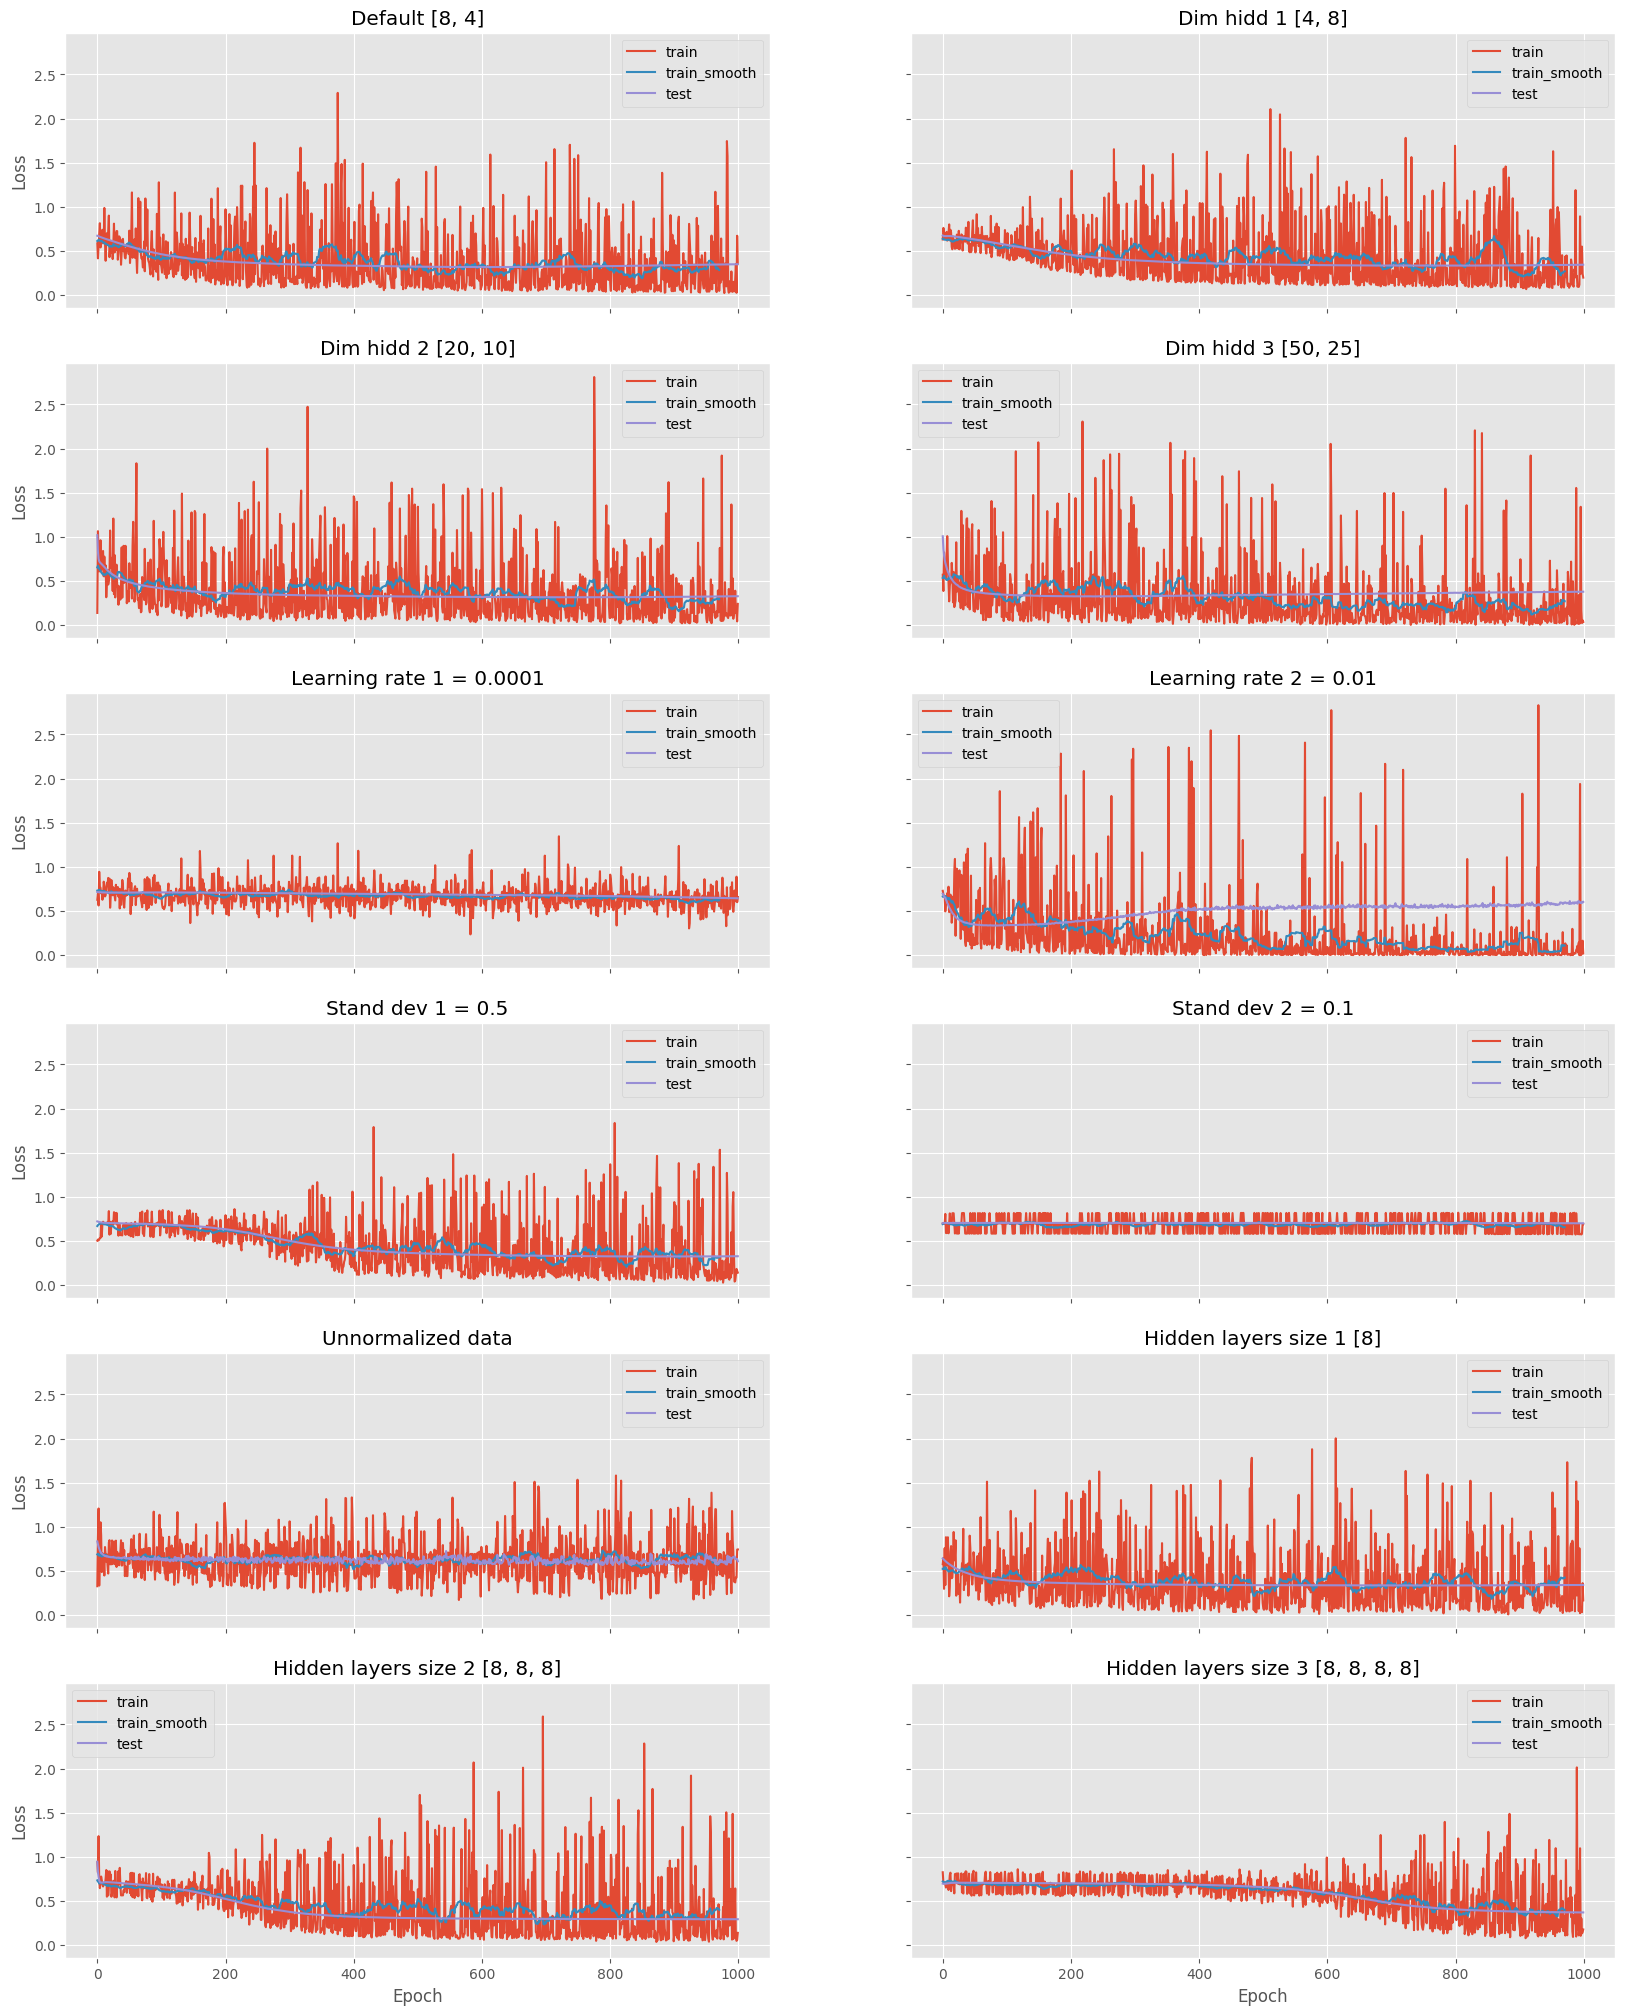

In [15]:
# plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, axs = plt.subplots(6, 2, figsize=(20, 25), sharey=True)

axs[0, 0].plot(loss_history_1, label='train')
axs[0, 0].plot(np.convolve(loss_history_1, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[0, 0].plot(test_hist_1, label='test')
axs[0, 0].set_title(f'Default {default_hidden_layers}')

axs[0, 1].plot(loss_history_2, label='train')
axs[0, 1].plot(np.convolve(loss_history_2, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[0, 1].plot(test_hist_2, label='test')
axs[0, 1].set_title(f'Dim hidd 1 {dim_hidd_1}')

axs[1, 0].plot(loss_history_3, label='train')
axs[1, 0].plot(np.convolve(loss_history_3, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[1, 0].plot(test_hist_3, label='test')
axs[1, 0].set_title(f'Dim hidd 2 {dim_hidd_2}')

axs[1, 1].plot(loss_history_4, label='train')
axs[1, 1].plot(np.convolve(loss_history_4, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[1, 1].plot(test_hist_4, label='test')
axs[1, 1].set_title(f'Dim hidd 3 {dim_hidd_3}')

axs[2, 0].plot(loss_history_5, label='train')
axs[2, 0].plot(np.convolve(loss_history_5, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[2, 0].plot(test_hist_5, label='test')
axs[2, 0].set_title(f'Learning rate 1 = {learning_rate_1}')

axs[2, 1].plot(loss_history_6, label='train')
axs[2, 1].plot(np.convolve(loss_history_6, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[2, 1].plot(test_hist_6, label='test')
axs[2, 1].set_title(f'Learning rate 2 = {learning_rate_2}')

axs[3, 0].plot(loss_history_7, label='train')
axs[3, 0].plot(np.convolve(loss_history_7, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[3, 0].plot(test_hist_7, label='test')
axs[3, 0].set_title(f'Stand dev 1 = {stand_dev_1}')

axs[3, 1].plot(loss_history_8, label='train')
axs[3, 1].plot(np.convolve(loss_history_8, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[3, 1].plot(test_hist_8, label='test')
axs[3, 1].set_title(f'Stand dev 2 = {stand_dev_2}')

axs[4, 0].plot(loss_history_9, label='train')
axs[4, 0].plot(np.convolve(loss_history_9, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[4, 0].plot(test_hist_9, label='test')
axs[4, 0].set_title('Unnormalized data')

axs[4, 1].plot(loss_history_10, label='train')
axs[4, 1].plot(np.convolve(loss_history_10, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[4, 1].plot(test_hist_10, label='test')
axs[4, 1].set_title(f'Hidden layers size 1 {hidden_layers_size_1}')

axs[5, 0].plot(loss_history_11, label='train')
axs[5, 0].plot(np.convolve(loss_history_11, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[5, 0].plot(test_hist_11, label='test')
axs[5, 0].set_title(f'Hidden layers size 2 {hidden_layers_size_2}')

axs[5, 1].plot(loss_history_12, label='train')
axs[5, 1].plot(np.convolve(loss_history_12, np.ones(30)/30, mode='valid'), label='train_smooth')
axs[5, 1].plot(test_hist_12, label='test')
axs[5, 1].set_title(f'Hidden layers size 3 {hidden_layers_size_3}')

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')
    ax.legend()

for ax in axs.flat:
    ax.label_outer()

plt.show()
